# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key
units = 'imperial'

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"


# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={units}&q="

In [2]:
print(citipy)
print(output_data_file)

<module 'citipy.citipy' from 'c:\\Users\\bryan\\anaconda3\\envs\\bryanenv\\lib\\site-packages\\citipy\\citipy.py'>
output_data/cities.csv


## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

612

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [4]:
response = requests.get(query_url + city.replace(" ","&")).json()
print(json.dumps(response, indent=4, sort_keys=True))

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 18.7369,
        "lon": 7.3853
    },
    "dt": 1653244590,
    "id": 2447513,
    "main": {
        "feels_like": 89.89,
        "grnd_level": 964,
        "humidity": 13,
        "pressure": 1010,
        "sea_level": 1010,
        "temp": 94.44,
        "temp_max": 94.44,
        "temp_min": 94.44
    },
    "name": "Arlit",
    "sys": {
        "country": "NE",
        "sunrise": 1653195273,
        "sunset": 1653242399
    },
    "timezone": 3600,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 170,
        "gust": 8.57,
        "speed": 7.58
    }
}


In [5]:
count1 = 0
count2 = 1

lat = []
long = []
cloudy = []
country = []
humid = []
high_temp = []
windspeed = []
dates = []
city_name = []

for city in cities: 
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        lat.append(response["coord"]['lat'])
        long.append(response["coord"]['lon'])
        high_temp.append(response['main']['temp_max'])
        windspeed.append(response['wind']['speed'])
        cloudy.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        dates.append(response['dt'])
        humid.append(response['main']['humidity'])
        
        if count1 > 48:
            count1 = 1
            count2 += 1
            city_name.append(city)
        else:
            count1 += 1
            city_name.append(city)
        print(f"Processing {count1} of {count2} | {city}")
    except Exception:
        print("Cant find city. Skipping...")
print("-----------------------------")
print("Data Retrieval is Complete")
print("-----------------------------")


Processing 1 of 1 | cape town
Processing 2 of 1 | luchegorsk
Cant find city. Skipping...
Processing 3 of 1 | busselton
Processing 4 of 1 | rio branco
Processing 5 of 1 | mataura
Processing 6 of 1 | arraial do cabo
Processing 7 of 1 | chernyshevskiy
Processing 8 of 1 | saint-philippe
Processing 9 of 1 | bilibino
Processing 10 of 1 | itarema
Processing 11 of 1 | albany
Processing 12 of 1 | morant bay
Processing 13 of 1 | tessalit
Processing 14 of 1 | tura
Processing 15 of 1 | souillac
Processing 16 of 1 | grand river south east
Processing 17 of 1 | innisfail
Processing 18 of 1 | port elizabeth
Processing 19 of 1 | hermanus
Processing 20 of 1 | kodiak
Processing 21 of 1 | bredasdorp
Processing 22 of 1 | castro
Processing 23 of 1 | goderich
Processing 24 of 1 | punta arenas
Processing 25 of 1 | aktau
Processing 26 of 1 | tazovskiy
Processing 27 of 1 | ushuaia
Processing 28 of 1 | aleksandrovsk-sakhalinskiy
Processing 29 of 1 | tyrma
Processing 30 of 1 | ngunguru
Processing 31 of 1 | iqalui

#### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
weather_df = pd.DataFrame({
    "City":city_name, 
    "Cloudiness":cloudy, 
    "Country":country, 
    "Date":dates, 
    "Humidity":humid, 
    "Lat":lat, 
    "Lng":long, 
    "Max Temp":high_temp, 
    "Wind Speed":windspeed
    })

weather_df.count()

City          547
Cloudiness    547
Country       547
Date          547
Humidity      547
Lat           547
Lng           547
Max Temp      547
Wind Speed    547
dtype: int64

In [11]:
#weather_df.head()

weather_df['City'] = weather_df['City'].str.title()
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Cape Town,100,CL,1653244595,89,-36.4130,-71.9028,49.42,17.98
1,Luchegorsk,13,RU,1653244595,90,46.4764,134.2569,44.69,2.48
2,Busselton,65,AU,1653244596,67,-33.6500,115.3333,61.27,23.49
3,Rio Branco,21,GR,1653244596,61,38.3000,21.7833,73.78,8.01
4,Mataura,100,NZ,1653244410,91,-46.1927,168.8643,44.33,7.65


In [12]:


# Save city data into a csv file
weather_df.to_csv("output_data/cities.csv", index = False)



## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [11]:
weather_df.loc[weather_df["Humidity"]> 100]
#100% humidity cities do not exist in this dataframe

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed


In [6]:
#  Get the indices of cities that have humidity over 100%.


In [7]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

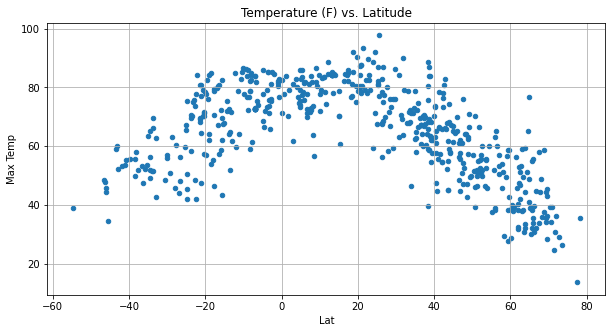

In [17]:
weather_df.plot(kind='scatter', x='Lat', y='Max Temp', grid=True, figsize=(10,5),
               title="Temperature (F) vs. Latitude")
plt.show()

#Based on the below scatter plot we can see that temps are higher between the 20s (both positive and negative) and coldest past 60 degrees Latitude.
#This trend is what we would expect to see when looking at this relationship.

## Latitude vs. Humidity Plot

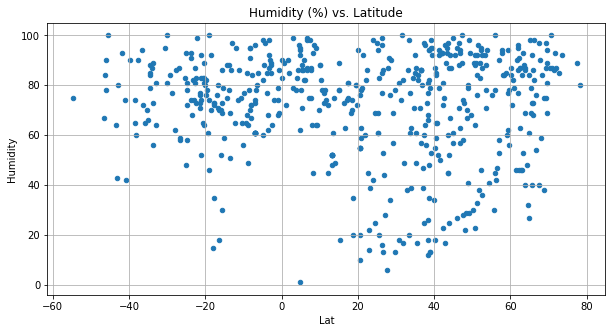

In [18]:
weather_df.plot(kind='scatter', x='Lat', y='Humidity', grid=True, figsize=(10,5),
               title="Humidity (%) vs. Latitude")
plt.show()

#As expected, there is much less of a correlation between humidity and latitude. 
#We can say that while high humidity seems to be fairly evenly spread across the different latitudes,
# the lower % humidity seems to be congregated at > +20 degrees latitude.

## Latitude vs. Cloudiness Plot

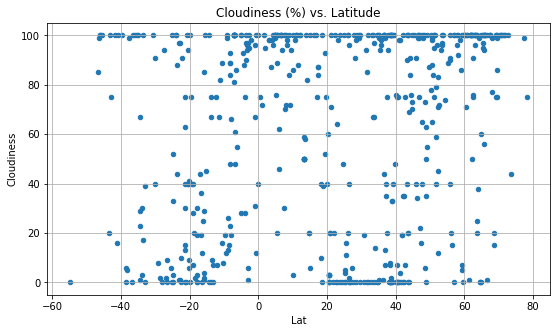

In [20]:
weather_df.plot(kind="scatter", x="Lat", y="Cloudiness", grid=True, figsize=(9,5),
              title="Cloudiness (%) vs. Latitude")
plt.show()

#There does not seem to be a clear correlation between degrees of latitude and cloudiness.

## Latitude vs. Wind Speed Plot

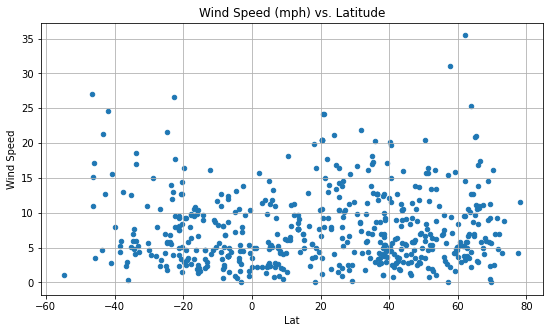

In [21]:
weather_df.plot(kind="scatter", x="Lat", y="Wind Speed", grid=True, figsize=(9,5),
              title="Wind Speed (mph) vs. Latitude")
plt.show()

#While we don't see much of a correlation between wind speed and latitude, we do see that the outlier high wind speeds tend to be above(or below) the 40 degree line.

## Linear Regression

In [23]:
north_hemi_df = weather_df.loc[weather_df["Lat"] > 0]
south_hemi_df = weather_df.loc[weather_df["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared value is: 0.6672945459566738


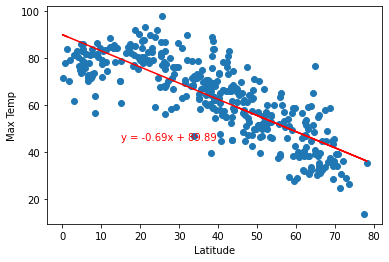

In [25]:
x_values = north_hemi_df['Lat']
y_values = north_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15,45),fontsize=10,color="red")
plt.ylabel('Max Temp')
plt.xlabel('Latitude')
print(f"The r-squared value is: {rvalue**2}")
plt.show()

#We see there is a negative correlation bewteen latitude and temp in the Northern Hemisphere.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared value is: 0.5016116920935709


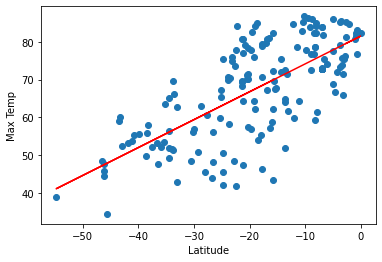

In [26]:
x_values = south_hemi_df['Lat']
y_values = south_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15,45),fontsize=10,color="red")
plt.ylabel('Max Temp')
plt.xlabel('Latitude')
print(f"The r-squared value is: {rvalue**2}")
plt.show()

#We can see that there is a positive correlation between latitude and temp in the Southern Hemisphere.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is: 0.0029596801750888966


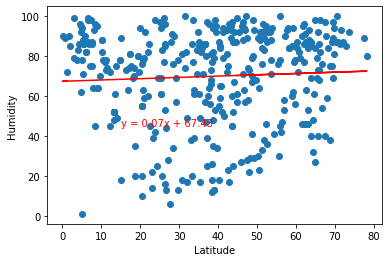

In [27]:
x_values = north_hemi_df['Lat']
y_values = north_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15,45),fontsize=10,color="red")
plt.ylabel('Humidity')
plt.xlabel('Latitude')
print(f"The r-squared value is: {rvalue**2}")
plt.show()

#There is virtually no correlation between humidity and latitude in the Northern Hemisphere.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is: 7.587773279593727e-05


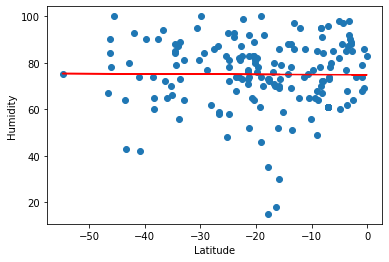

In [28]:
x_values = south_hemi_df['Lat']
y_values = south_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15,45),fontsize=10,color="red")
plt.ylabel('Humidity')
plt.xlabel('Latitude')
print(f"The r-squared value is: {rvalue**2}")
plt.show()

#Same as the Northern Hemisphere, there is no correlation between humidity and latitude.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared value is: 0.006911236866818738


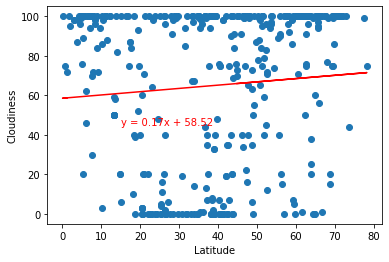

In [29]:
x_values = north_hemi_df['Lat']
y_values = north_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15,45),fontsize=10,color="red")
plt.ylabel('Cloudiness')
plt.xlabel('Latitude')
print(f"The r-squared value is: {rvalue**2}")
plt.show()

#We see a very weak positive correlation between cloudiness and latitude in the Northern Hemisphere.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared value is: 0.012420636083241517


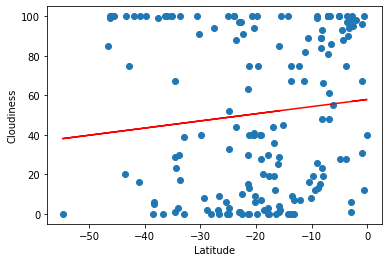

In [30]:
x_values = south_hemi_df['Lat']
y_values = south_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15,45),fontsize=10,color="red")
plt.ylabel('Cloudiness')
plt.xlabel('Latitude')
print(f"The r-squared value is: {rvalue**2}")
plt.show()

#We see a very weak positive correlation between cloudiness and latitude in the Southern Hemisphere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared value is: 0.0010091472802878014


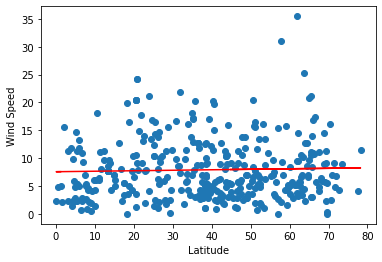

In [31]:
x_values = north_hemi_df['Lat']
y_values = north_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15,45),fontsize=10,color="red")
plt.ylabel('Wind Speed')
plt.xlabel('Latitude')
print(f"The r-squared value is: {rvalue**2}")
plt.show()

#There is virtually no correlation between wind speed and latitude in the Northern Hemisphere.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared value is: 0.08178095600273666


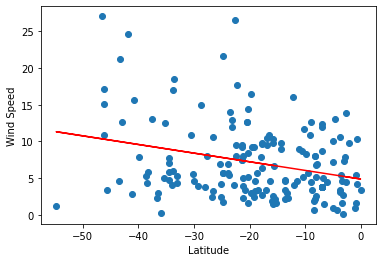

In [32]:
x_values = south_hemi_df['Lat']
y_values = south_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15,45),fontsize=10,color="red")
plt.ylabel('Wind Speed')
plt.xlabel('Latitude')
print(f"The r-squared value is: {rvalue**2}")
plt.show()

#There is a slight negative correlation between wind speed and latitude in the Southern Hemisphere.